In [2]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials 
client_id = "28f2a7158e244377b62b046a4c8e00f7"
client_secret = "35177b59a83241c4add599041b284eb2"
client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager) 

In [3]:
name = ["Micheal Jackson","pitbull","Christina","Elvis Presley"]
result = sp.search(name) 
result['tracks']['items'][1]['artists']

[{'external_urls': {'spotify': 'https://open.spotify.com/artist/3fMbdgg4jU18AjLCKBhRSm'},
  'href': 'https://api.spotify.com/v1/artists/3fMbdgg4jU18AjLCKBhRSm',
  'id': '3fMbdgg4jU18AjLCKBhRSm',
  'name': 'Michael Jackson',
  'type': 'artist',
  'uri': 'spotify:artist:3fMbdgg4jU18AjLCKBhRSm'}]

In [4]:
artists_uris = result['tracks']['items'][0]['artists'][0]['uri']
#Pull all of the artist's albums
artist_albums = sp.artist_albums(artists_uris, album_type='album')
#Store artist's albums' names' and uris in separate lists
artist_album_names = []
artist_album_uris = []
for i in range(len(artist_albums['items'])):
    artist_album_names.append(artist_albums['items'][i]['name'])
    artist_album_uris.append(artist_albums['items'][i]['uri'])
    
artist_album_names
artist_album_uris

['spotify:album:57TzZhbqvYoUBzJSVKFVlG',
 'spotify:album:54WFfZzds26NrwcmStfamd',
 'spotify:album:7pomP86PUhoJpY3fsC0WDQ',
 'spotify:album:24TAupSNVWSAHL0R7n71vm',
 'spotify:album:5S7ySBYbWKsZdVYQrNtrWf',
 'spotify:album:1C2h7mLntPSeVYciMRTF4a',
 'spotify:album:52E4RP7XDzalpIrOgSTgiQ',
 'spotify:album:0RNsFWWdiz1rrdLI1pwbvJ',
 'spotify:album:3OBhnTLrvkoEEETjFA3Qfk',
 'spotify:album:0oX4SealMgNXrvRDhqqOKg',
 'spotify:album:3Us57CjssWnHjTUIXBuIeH',
 'spotify:album:2ANVost0y2y52ema1E9xAZ',
 'spotify:album:2ZytN2cY4Zjrr9ukb2rqTP',
 'spotify:album:6leeBdAohG7zhybC3Cmu8W',
 'spotify:album:19vhLDr0Fw8Lja1I8xVV09',
 'spotify:album:3xo2soey9XEBI5DlmT4KlQ',
 'spotify:album:0F4XW0iBOhNFkbn1BuQ8cu']

In [5]:
def album_songs(uri):
    album = uri 
    spotify_albums[album] = {}
    #Create keys-values of empty lists inside nested dictionary for album
    spotify_albums[album]['album'] = [] 
    spotify_albums[album]['track_number'] = []
    spotify_albums[album]['id'] = []
    spotify_albums[album]['name'] = []
    spotify_albums[album]['uri'] = []
    #pull data on album tracks
    tracks = sp.album_tracks(album) 
    for n in range(len(tracks['items'])): 
        spotify_albums[album]['album'].append(artist_album_names[album_count]) 
        spotify_albums[album]['track_number'].append(tracks['items'][n]['track_number'])
        spotify_albums[album]['id'].append(tracks['items'][n]['id'])
        spotify_albums[album]['name'].append(tracks['items'][n]['name'])
        spotify_albums[album]['uri'].append(tracks['items'][n]['uri'])

In [6]:
spotify_albums = {}
album_count = 0
for i in artist_album_uris: #each album
    album_songs(i)
    print(str(artist_album_names[album_count]) + " album songs has been added to spotify_albums dictionary")
    album_count+=1 #Updates album count once all tracks have been added

Thriller 40 album songs has been added to spotify_albums dictionary
XSCAPE - Track by Track Commentary album songs has been added to spotify_albums dictionary
XSCAPE album songs has been added to spotify_albums dictionary
Bad 25th Anniversary album songs has been added to spotify_albums dictionary
Michael album songs has been added to spotify_albums dictionary
Thriller 25 Super Deluxe Edition album songs has been added to spotify_albums dictionary
Invincible album songs has been added to spotify_albums dictionary
BLOOD ON THE DANCE FLOOR/ HIStory In The Mix album songs has been added to spotify_albums dictionary
HIStory - PAST, PRESENT AND FUTURE - BOOK I album songs has been added to spotify_albums dictionary
Dangerous album songs has been added to spotify_albums dictionary
Bad (Remastered) album songs has been added to spotify_albums dictionary
Thriller album songs has been added to spotify_albums dictionary
Off the Wall album songs has been added to spotify_albums dictionary
Forever

In [7]:
def audio_features(album):
    #Add new key-values to store audio features
    spotify_albums[album]['acousticness'] = []
    spotify_albums[album]['danceability'] = []
    spotify_albums[album]['energy'] = []
    spotify_albums[album]['instrumentalness'] = []
    spotify_albums[album]['liveness'] = []
    spotify_albums[album]['loudness'] = []
    spotify_albums[album]['speechiness'] = []
    spotify_albums[album]['tempo'] = []
    spotify_albums[album]['valence'] = []
    spotify_albums[album]['popularity'] = []
    
    track_count = 0
    for track in spotify_albums[album]['uri']:
        #pull audio features per track
        features = sp.audio_features(track)
        
         #Append to relevant key-value
        spotify_albums[album]['acousticness'].append(features[0]['acousticness'])
        spotify_albums[album]['danceability'].append(features[0]['danceability'])
        spotify_albums[album]['energy'].append(features[0]['energy'])
        spotify_albums[album]['instrumentalness'].append(features[0]['instrumentalness'])
        spotify_albums[album]['liveness'].append(features[0]['liveness'])
        spotify_albums[album]['loudness'].append(features[0]['loudness'])
        spotify_albums[album]['speechiness'].append(features[0]['speechiness'])
        spotify_albums[album]['tempo'].append(features[0]['tempo'])
        spotify_albums[album]['valence'].append(features[0]['valence'])
        #popularity is stored elsewhere
        pop = sp.track(track)
        spotify_albums[album]['popularity'].append(pop['popularity'])
        track_count+=1

In [8]:
import time
import numpy as np
sleep_min = 2
sleep_max = 5
start_time = time.time()
request_count = 0
for i in spotify_albums:
    audio_features(i)
    request_count+=1
    if request_count % 5 == 0:
        print(str(request_count) + " playlists completed")
        time.sleep(np.random.uniform(sleep_min, sleep_max))
        print('Loop #: {}'.format(request_count))
        print('Elapsed Time: {} seconds'.format(time.time() - start_time))

5 playlists completed
Loop #: 5
Elapsed Time: 24.026395320892334 seconds
10 playlists completed
Loop #: 10
Elapsed Time: 48.82043981552124 seconds
15 playlists completed
Loop #: 15
Elapsed Time: 67.18225073814392 seconds


In [9]:
dic_df = {}
dic_df['album'] = []
dic_df['track_number'] = []
dic_df['id'] = []
dic_df['name'] = []
dic_df['uri'] = []
dic_df['acousticness'] = []
dic_df['danceability'] = []
dic_df['energy'] = []
dic_df['instrumentalness'] = []
dic_df['liveness'] = []
dic_df['loudness'] = []
dic_df['speechiness'] = []
dic_df['tempo'] = []
dic_df['valence'] = []
dic_df['popularity'] = []
for album in spotify_albums: 
    for feature in spotify_albums[album]:
        dic_df[feature].extend(spotify_albums[album][feature])
        
len(dic_df['album'])


263

In [10]:
import pandas as pd
dataframe = pd.DataFrame.from_dict(dic_df)
dataframe

,album,track_number,id,name,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity
0,Thriller 40,1,2rTP0iwaMxRy2HFW2nHKq9,Wanna Be Startin' Somethin',spotify:track:2rTP0iwaMxRy2HFW2nHKq9,0.0726,0.846,0.948,0.236000,0.0749,-4.284,0.0474,122.178,0.867,52
1,Thriller 40,2,0z0HC6sLfJsTP5bqVPiIw6,Baby Be Mine,spotify:track:0z0HC6sLfJsTP5bqVPiIw6,0.2220,0.840,0.628,0.000010,0.0905,-5.607,0.0800,109.646,0.679,44
2,Thriller 40,3,46bcHfciO740CEABQrvLrR,The Girl Is Mine (with Paul McCartney),spotify:track:46bcHfciO740CEABQrvLrR,0.4080,0.438,0.684,0.000002,0.3790,-6.986,0.0848,78.705,0.727,46
3,Thriller 40,4,2x4x2j4mrdFMuSQnIJDVWM,Thriller,spotify:track:2x4x2j4mrdFMuSQnIJDVWM,0.1360,0.771,0.857,0.000056,0.8950,-5.060,0.0742,118.415,0.759,50
4,Thriller 40,5,2x0O1Lg3lhpUqw30Hamzke,Beat It,spotify:track:2x0O1Lg3lhpUqw30Hamzke,0.0713,0.783,0.830,0.000008,0.1410,-4.874,0.0421,138.821,0.922,52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,Got To Be There,6,63gcHyuhAC8G2C0bVQUOJI,Rockin' Robin,spotify:track:63gcHyuhAC8G2C0bVQUOJI,0.2400,0.622,0.721,0.000079,0.2710,-8.224,0.0983,173.395,0.968,49
259,Got To Be There,7,5h6EHy1GvTcGrpedGZCPHL,Wings Of My Love,spotify:track:5h6EHy1GvTcGrpedGZCPHL,0.2820,0.593,0.486,0.029600,0.0844,-11.095,0.0305,118.724,0.589,23
260,Got To Be There,8,0w5Jpsn5Hr3CZkN2TvE681,Maria (You Were The Only One) - Single Version,spotify:track:0w5Jpsn5Hr3CZkN2TvE681,0.0273,0.418,0.645,0.000016,0.1070,-8.879,0.0751,157.980,0.538,25
261,Got To Be There,9,1UWM5Y6O7jU4ec2iaNn1os,Love Is Here And Now You're Gone,spotify:track:1UWM5Y6O7jU4ec2iaNn1os,0.0558,0.649,0.753,0.055700,0.1210,-8.964,0.0499,123.064,0.830,22


In [11]:
print(len(dataframe))
final_df = dataframe.sort_values('popularity', ascending=False).drop_duplicates('name').sort_index()
print(len(final_df))

263
216


In [12]:
final_df.head()

,album,track_number,id,name,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity
9,Thriller 40,10,4WGwTL5HIiaw5OIFnwgCR9,Starlight,spotify:track:4WGwTL5HIiaw5OIFnwgCR9,0.1230,0.701,0.837,0.000021,0.0884,-5.614,0.0384,117.448,0.636,40
10,Thriller 40,11,21fVbhoPzmlLjxWfePb6CT,Got the Hots - Demo,spotify:track:21fVbhoPzmlLjxWfePb6CT,0.0578,0.783,0.692,0.000000,0.0540,-5.359,0.0388,121.714,0.662,39
11,Thriller 40,12,5kMng2A15zTwpxiPHypbHm,Who Do You Know - Demo,spotify:track:5kMng2A15zTwpxiPHypbHm,0.7360,0.639,0.295,0.000038,0.1860,-11.154,0.0621,170.425,0.741,38
13,Thriller 40,14,32gg7lWCipR6jYiz9qXwSo,Behind The Mask - Mike's Mix (Demo),spotify:track:32gg7lWCipR6jYiz9qXwSo,0.1370,0.760,0.784,0.149000,0.2740,-6.131,0.0310,115.936,0.772,36
14,Thriller 40,15,5yuLvy5xOhnhMZL0SjIZcX,Can't Get Outta The Rain,spotify:track:5yuLvy5xOhnhMZL0SjIZcX,0.0227,0.721,0.946,0.000000,0.3550,-4.006,0.1980,127.155,0.845,36


In [13]:
final_df.to_csv("spotify_music.csv")

In [18]:
import os
import numpy as np
import pandas as pd

import seaborn as sns
import plotly.express as px 
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.metrics import euclidean_distances
from scipy.spatial.distance import cdist
from matplotlib import pyplot as plt
from matplotlib.pyplot import plot
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

2024-05-22 05:06:32.898338: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-22 05:06:32.898406: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-22 05:06:32.899862: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-05-22 05:06:32.911546: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-22 05:06:34.601664: W tensorflow/comp

In [19]:
data = pd.read_csv('data.csv')
genre_data = pd.read_csv('data_by_genres.csv')
year_data = pd.read_csv('data_by_year.csv')
artist_data = pd.read_csv('data_by_artist.csv')

In [20]:
print(data.info())
print(genre_data.info())
print(year_data.info())
print(artist_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           170653 non-null  float64
 1   year              170653 non-null  int64  
 2   acousticness      170653 non-null  float64
 3   artists           170653 non-null  object 
 4   danceability      170653 non-null  float64
 5   duration_ms       170653 non-null  int64  
 6   energy            170653 non-null  float64
 7   explicit          170653 non-null  int64  
 8   id                170653 non-null  object 
 9   instrumentalness  170653 non-null  float64
 10  key               170653 non-null  int64  
 11  liveness          170653 non-null  float64
 12  loudness          170653 non-null  float64
 13  mode              170653 non-null  int64  
 14  name              170653 non-null  object 
 15  popularity        170653 non-null  int64  
 16  release_date      17

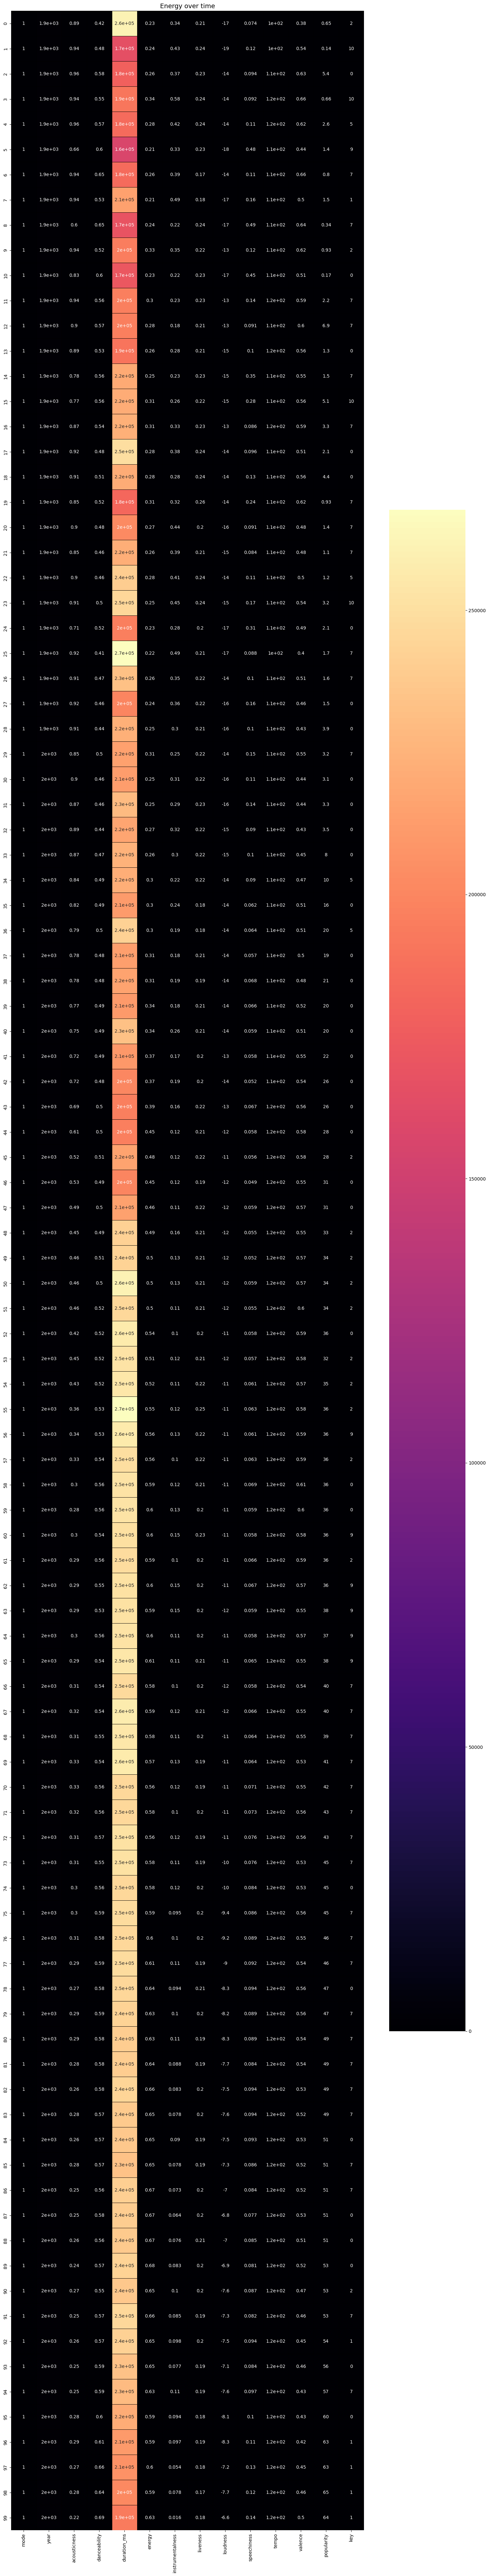

In [24]:
year_data.pivot('year','duration_ms','energy').head()
plt.figure(figsize=(20,100))
pivot_table = year_data.pivot('year','duration_ms','energy')
plt.xlabel('year', size = 14)
plt.ylabel('duration_ms', size = 14)
plt.title('Energy over time', size = 14)
sns.heatmap(year_data, annot=True, linewidths=.4,linecolor='black', square=True, cmap='magma',cbar=True);

In [25]:
df = pd.read_csv('dataset.csv')
corr=df.corr()
corr

,Unnamed: 0,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
Unnamed: 0,1.000000,0.032142,-0.032743,-0.054736,0.003444,-0.055994,-0.005520,-0.027307,0.005107,-0.084952,0.076840,-0.070286,0.033639,0.053111,-0.025824,-0.021115
popularity,0.032142,1.000000,-0.007101,0.044082,0.035448,0.001056,-0.003853,0.050423,-0.013931,-0.044927,-0.025472,-0.095139,-0.005387,-0.040534,0.013205,0.031073
duration_ms,-0.032743,-0.007101,1.000000,-0.065263,-0.073426,0.058523,0.008114,-0.003470,-0.035556,-0.062600,-0.103788,0.124371,0.010321,-0.154479,0.024346,0.018225
explicit,-0.054736,0.044082,-0.065263,1.000000,0.122507,0.096955,0.004484,0.108588,-0.037212,0.307952,-0.094403,-0.103404,0.032549,-0.003381,-0.002816,0.038386
danceability,0.003444,0.035448,-0.073426,0.122507,1.000000,0.134325,0.036469,0.259077,-0.069219,0.108626,-0.171533,-0.185606,-0.131617,0.477341,-0.050450,0.207218
energy,-0.055994,0.001056,0.058523,0.096955,0.134325,1.000000,0.048006,0.761690,-0.078362,0.142509,-0.733906,-0.181879,0.184796,0.258934,0.247851,0.187126
key,-0.005520,-0.003853,0.008114,0.004484,0.036469,0.048006,1.000000,0.038590,-0.135916,0.020418,-0.040937,-0.006823,-0.001600,0.034103,0.010917,0.015065
loudness,-0.027307,0.050423,-0.003470,0.108588,0.259077,0.761690,0.038590,1.000000,-0.041764,0.060826,-0.589803,-0.433477,0.076899,0.279848,0.212446,0.191992
mode,0.005107,-0.013931,-0.035556,-0.037212,-0.069219,-0.078362,-0.135916,-0.041764,1.000000,-0.046532,0.095553,-0.049955,0.014012,0.021953,0.000566,-0.024092
speechiness,-0.084952,-0.044927,-0.062600,0.307952,0.108626,0.142509,0.020418,0.060826,-0.046532,1.000000,-0.002186,-0.089616,0.205219,0.036635,0.017273,-0.000011


In [26]:
df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


Text(0.5, 0.98, '')

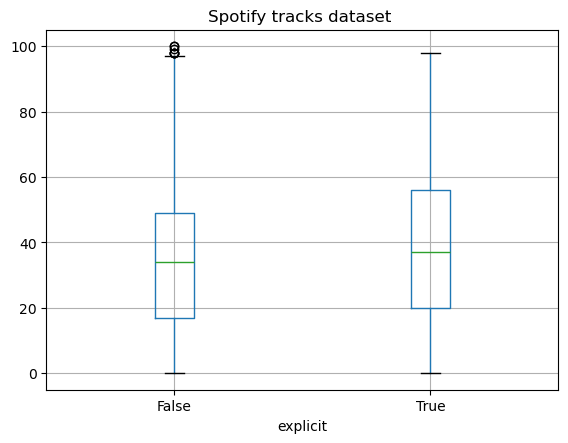

In [34]:
plot_df = pd.read_csv('dataset.csv')
plot_df.head()
plot_df['explicit'].value_counts(dropna = False)
plot_df.boxplot(column='popularity', by ='explicit')
plt.title('Spotify tracks dataset ')
plt.suptitle('')

<Axes: xlabel='explicit', ylabel='popularity'>

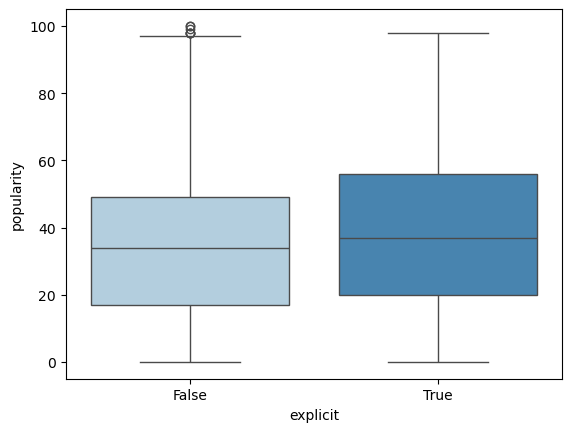

In [35]:
sns.boxplot(x='explicit', y='popularity', data=plot_df, palette='Blues' )

In [31]:
data = pd.read_csv('dataset.csv')

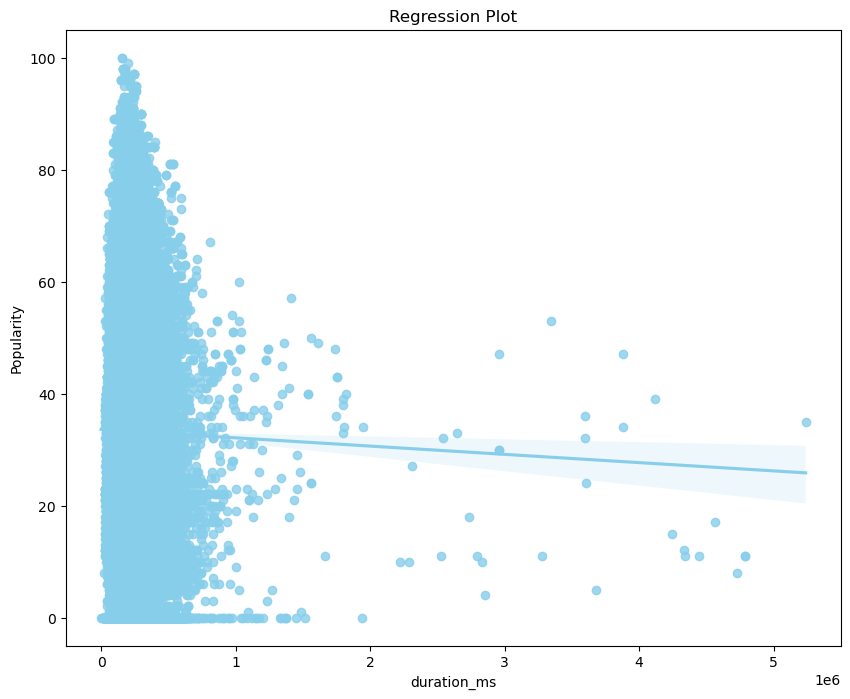

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame called data with columns 'popularity' and the feature you want to plot against
x = data['duration_ms']  # Replace 'feature_column' with the actual column name you want to plot on the x-axis
y = data['popularity']

plt.figure(figsize=(10, 8))
sns.regplot(x=x, y=y, color="Skyblue", truncate=True)
plt.xlabel('duration_ms')  # Replace with the actual name of your feature for better clarity
plt.ylabel('Popularity')
plt.title('Regression Plot')
plt.show()


<Axes: xlabel='explicit', ylabel='popularity'>

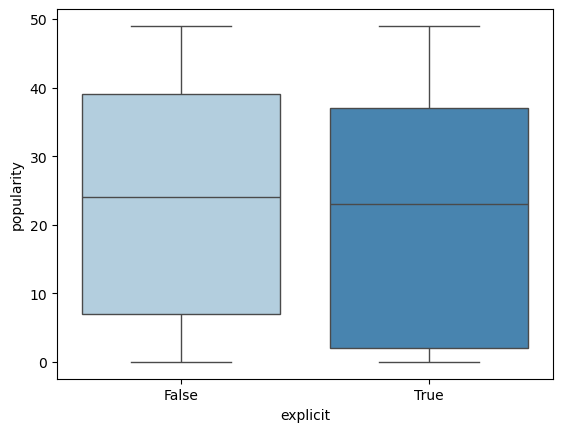

In [36]:
def outliers(df, ft):
    Q1 = df[ft].quantile(0.25)
    Q3 = df[ft].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 = 1.5 * IQR
    ls = df.index[(df[ft] < lower_bound) | (df[ft] > upper_bound)]
    return ls
index_list = []
for feature in ['popularity']:
    index_list.extend(outliers(plot_df, feature))
def remove(df, ls):
    ls = sorted(set(ls))
    df = df.drop(ls)
    return df
cleaned_df = remove(plot_df, index_list)
sns.boxplot(x='explicit', y='popularity', data = cleaned_df, palette='Blues')

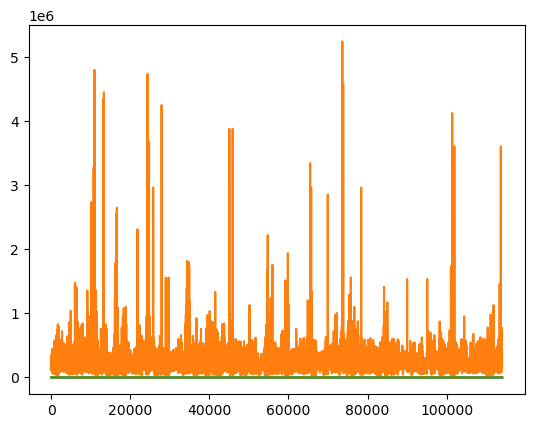

<Figure size 1000x1000 with 0 Axes>

In [37]:
data = pd.read_csv('dataset.csv')
data.head()
data.columns
data = data[['popularity','duration_ms','danceability', 'energy',
       'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature']]
data.head()
mean = np.mean(data)
std = np.std(data)
plt.plot(data)
plt.figure(figsize=(10,10))
plt.show()

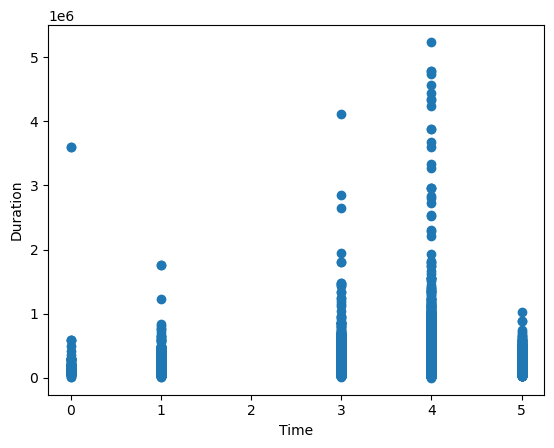

<Figure size 1000x1000 with 0 Axes>

In [38]:
data = pd.read_csv('dataset.csv')
data = data[['time_signature', 'duration_ms']]
data = pd.DataFrame(data)

plt.scatter(df['time_signature'], df['duration_ms'])
plt.xlabel('Time')
plt.ylabel('Duration')
plt.figure(figsize=(10,10))
plt.show()

In [44]:
data = pd.read_csv('dataset.csv')
data.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [45]:
train_data, val_and_test_data = train_test_split(data, test_size=0.3)
val_data, test_data = train_test_split(val_and_test_data, test_size=0.5)

In [46]:
print(train_data.shape)  
print(val_data.shape)    
print(test_data.shape)  

(79800, 21)
(17100, 21)
(17100, 21)


In [47]:
print(train_data.head())  

       Unnamed: 0                track_id  \
87589       87589  4j88zPsDSuGJR5W5n8AKEQ   
48363       48363  5EWWCzpA6D8UTRbVQbScp6   
98351       98351  5gw8HNcrqliEw0X6pPrPvG   
1361         1361  4KRAPYoTgdQ6eJCU78F589   
28746       28746  0vdZk0uHh0PaEQpY5PHG6n   

                                                 artists  \
87589                                        Andrew Bird   
48363                        Tony Yayo;Eminem;Obie Trice   
98351  Rosario Dawson;Taye Diggs;Idina Menzel;Jesse L...   
1361                                          QUITAPENAS   
28746               Groundation;Pablo Moses;Ijahman Levi   

                                      album_name          track_name  \
87589                            sadsadchristmas  Christmas In April   
48363              Thoughts Of A Predicate Felon        Drama Setter   
98351  RENT (Original Motion Picture Soundtrack)     Seasons of Love   
1361                                  QUITAPENAS        Valle Moreno   
28746   

In [48]:
print(val_data.head())    

       Unnamed: 0                track_id                   artists  \
24081       24081  6OEdPvDY90N7jxb2KslTB8                Carl Craig   
15351       15351  5o5WaO9pzPhXSGIrTIYVce                grentperez   
32758       32758  6fgmNIMwDdLQrNzu4U8pcU  Moderat;Siriusmo;Solomun   
61904       61904  0drkpiibrRIpUc5tSubX2J                 Yui Horie   
90084       90084  40L8OVaEpyF7KTRWTNvJGY              The Platters   

                                         album_name  \
24081   More Songs About Food and Revolutionary Art   
15351                                   Cherry Wine   
32758  Eating Hooks (Siriusmo Remix - Solomun Edit)   
61904                                      秘密の庭のふたり   
90084                  Classic Christmas Music 2022   

                                         track_name  popularity  duration_ms  \
24081                         Televised Green Smoke          13       375893   
15351                                   Cherry Wine          65       173286   
32

In [49]:
print(test_data.head())

       Unnamed: 0                track_id  \
39043       39043  20uRKbaqAVJRGyGE6mr6Oi   
10875       10875  1ZiR1Rc3zpxsflT2tBskfp   
80790       80790  2TKBCWeVnjdyzOL4xgYLmo   
93172       93172  0ywd9lXPKFOw9qW14SDjI3   
34585       34585  7BVwi9cIzSc6tpyxsp47vJ   

                                                 artists  \
39043  Johann Sebastian Bach;Daniel Hope;Lorenza Borr...   
10875                                            Orbital   
80790                           A.R. Rahman;Arijit Singh   
93172                              Valentina Ponomaryova   
34585                                          Vance Joy   

                 album_name                                 track_name  \
39043   Classical Christmas  Suite No. 3 in D Major, BWV 1068: II. Air   
10875              P.H.U.K.                                   P.H.U.K.   
80790            Atrangi Re                           Tumhein Mohabbat   
93172   Моей душе покоя нет                  Любовь - волшебная страна  

In [51]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import StandardScaler

In [52]:
data = pd.read_csv('dataset.csv')
data = data[['popularity', 'duration_ms', 'danceability', 'energy', 'loudness', 'mode', 'speechiness', 'acousticness',
             'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature']]


In [53]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [54]:
def create_sequences(data, seq_length):
    sequences = []
    targets = []
    for i in range(len(data) - seq_length):
        sequences.append(data[i:i+seq_length])
        targets.append(data[i+seq_length][0])  # Predicting popularity
    return np.array(sequences), np.array(targets)

In [55]:
SEQ_LENGTH = 30
x, y = create_sequences(data_scaled, SEQ_LENGTH)

In [56]:
train_size = int(0.7 * len(x))
val_size = int(0.15 * len(x))
test_size = len(x) - train_size - val_size

In [57]:
x_train, y_train = x[:train_size], y[:train_size]
x_val, y_val = x[train_size:train_size+val_size], y[train_size:train_size+val_size]
x_test, y_test = x[train_size+val_size:], y[train_size+val_size:]


In [58]:
model = Sequential()
model.add(LSTM(128, input_shape=(SEQ_LENGTH, data.shape[1]), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(64, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))

2024-05-22 05:52:31.478400: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:274] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


In [59]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 128)           72704     
                                                                 
 dropout (Dropout)           (None, 30, 128)           0         
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 122177 (477.25 KB)
Trainable params: 122177 (477.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [60]:
model.compile(optimizer='adam', loss='mse')

In [ ]:
history = model.fit(x_train, y_train, epochs=100, batch_size=32, validation_data=(x_val, y_val))


Epoch 1/100


2024-05-22 05:54:06.130630: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 124455240 exceeds 10% of free system memory.


2494/2494 [==============================] - 150s 58ms/step - loss: 0.3963 - val_loss: 0.4226
Epoch 2/100
2494/2494 [==============================] - 143s 57ms/step - loss: 0.3748 - val_loss: 0.4169
Epoch 3/100
2494/2494 [==============================] - 143s 57ms/step - loss: 0.3666 - val_loss: 0.4179
Epoch 4/100
2494/2494 [==============================] - 145s 58ms/step - loss: 0.3624 - val_loss: 0.4211
Epoch 5/100
2494/2494 [==============================] - 143s 57ms/step - loss: 0.3605 - val_loss: 0.4157
Epoch 6/100
2494/2494 [==============================] - 144s 58ms/step - loss: 0.3562 - val_loss: 0.4212
Epoch 7/100
2494/2494 [==============================] - 144s 58ms/step - loss: 0.3517 - val_loss: 0.4178
Epoch 8/100
2494/2494 [==============================] - 143s 57ms/step - loss: 0.3465 - val_loss: 0.4272
Epoch 9/100
2494/2494 [==============================] - 146s 59ms/step - loss: 0.3419 - val_loss: 0.4317
Epoch 10/100
2494/2494 [==============================] - 

In [63]:
loss = model.evaluate(x_test, y_test)
print(f'Test Loss: {loss}')

535/535 [==============================] - 9s 17ms/step - loss: 0.5864
Test Loss: 0.586418092250824


In [70]:
# Save the model
model.save('music_recommendation_lstm.h5')

In [72]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import load_model

In [76]:
# Load the model
model = load_model('music_recommendation_lstm.h5')

# Load the data
data = pd.read_csv('dataset.csv')
data = data[['album_name', 'popularity', 'duration_ms', 'danceability', 'energy', 'loudness', 'mode', 'speechiness', 'acousticness',
             'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature']]

# Select numeric columns
numeric_cols = ['acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature']

# Filter the DataFrame to include only numeric columns
data_numeric = data[numeric_cols]

# Normalize the features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_numeric)

# Normalize the features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_numeric)


In [77]:
def create_sequences(data, seq_length):
    sequences = []
    for i in range(len(data) - seq_length):
        sequences.append(data[i:i+seq_length])
    return np.array(sequences)

SEQ_LENGTH = 30
sequences = create_sequences(data_scaled, SEQ_LENGTH)

# Get the user's listening history (last SEQ_LENGTH songs)
user_sequence = data_scaled[-SEQ_LENGTH:]

# Calculate similarity between user_sequence and each sequence in the dataset
def calculate_similarity(user_sequence, data_sequences):
    similarities = []
    for seq in data_sequences:
        similarity = np.linalg.norm(user_sequence - seq)
        similarities.append(similarity)
    return np.array(similarities)

similarities = calculate_similarity(user_sequence, sequences)

# Find the indices of the top N most similar sequences
top_n = 10
top_indices = similarities.argsort()[:top_n]

# Get the recommended songs
recommended_songs = data.iloc[top_indices]
print(recommended_songs)

                 album_name  popularity  duration_ms  danceability  energy  \
4005   Cigarettes After Sex          78       215150         0.405   0.479   
70789            陳中+邱芸子情歌對唱          23       265853         0.491   0.510   
70293                  卡通人物          59       259373         0.473   0.488   
70072                   新地球          61       298293         0.486   0.424   
70648               唯一想了解的人          23       220630         0.553   0.458   
70557                    未來          48       269293         0.627   0.408   
12028                寂寞的星期五          40       118514         0.595   0.405   
70411                哎呦 不錯哦          53       289480         0.523   0.572   
40628   Profetiza (Ao vivo)          40       292624         0.443   0.777   
70153                 依然范特西          55       263973         0.719   0.640   

       loudness  mode  speechiness  acousticness  instrumentalness  liveness  \
4005     -9.396     1       0.0301        0.0527          0.7